# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
#The list of cities and weather for each city was pulled and recorded on June 24, 2020.  The weather data was pulled from : http://api.openweathermap.org/data/2.5/

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import os
import csv
import json
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


602

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [29]:
#create base url for API calls and empty lists to append with data
weath_url = 'http://api.openweathermap.org/data/2.5/weather?q='
responses = []
city_name = []
city_id = []
country = []
lat = []
lon = []
date = []
max_temp = []
humid = []
cloud = []
wind = []

for city in cities:
    try:
        weather_data = requests.get(f'{weath_url}{city}&appid={weather_api_key}&units=imperial').json()
        responses.append(weather_data)
        city_name.append(weather_data['name'])
        city_id.append(weather_data['id'])
        country.append(weather_data['sys']['country'])
        lat.append(weather_data['coord']['lat'])
        lon.append(weather_data['coord']['lon'])
        date.append(weather_data['dt'])
        max_temp.append(weather_data['main']['temp_max'])
        humid.append(weather_data['main']['humidity'])
        cloud.append(weather_data['clouds']['all'])
        wind.append(weather_data['wind']['speed'])
        
        print(f" City: {city} , ID: {weather_data['id']}")
    
    except:
        print(f"{city} not found")
        pass      


 City: barcelona , ID: 3128760
 City: mana , ID: 3381041
 City: rikitea , ID: 4030556
 City: wilmington , ID: 4499379
 City: puerto ayora , ID: 3652764
 City: hilo , ID: 5855927
 City: bluff , ID: 2206939
 City: tuatapere , ID: 2180815
illoqqortoormiut not found
 City: atuona , ID: 4020109
 City: castro , ID: 3466704
 City: torbay , ID: 6167817
 City: dunedin , ID: 2191562
 City: bredasdorp , ID: 1015776
 City: hermanus , ID: 3366880
 City: punta arenas , ID: 3874787
 City: vestmanna , ID: 2610343
 City: ushuaia , ID: 3833367
 City: isangel , ID: 2136825
 City: san cristobal , ID: 3628473
karamea not found
 City: klaksvik , ID: 2618795
 City: ponta do sol , ID: 2264557
 City: malakal , ID: 370737
 City: victoria , ID: 1819729
 City: vung tau , ID: 1562414
 City: saint-pierre , ID: 935214
 City: calama , ID: 3897347
 City: bethel , ID: 5282297
 City: albany , ID: 5106841
 City: el tigre , ID: 3641351
 City: chuy , ID: 3443061
 City: mataura , ID: 6201424
 City: karaidel , ID: 552862
 Ci

 City: nantucket , ID: 4944903
 City: maholi , ID: 1264356
 City: port hardy , ID: 6111862
 City: liwale , ID: 155921
 City: sao joao da barra , ID: 3448903
 City: khasan , ID: 2039557
 City: buchanan , ID: 2278158
 City: cidreira , ID: 3466165
naftah not found
 City: oistins , ID: 3373652
dolbeau not found
 City: balkanabat , ID: 161616
 City: henties bay , ID: 3356832
 City: takoradi , ID: 2294915
 City: mezen , ID: 527321
 City: ngunguru , ID: 2186111
gangotri not found
 City: pucallpa , ID: 3693345
 City: bambanglipuro , ID: 1650434
 City: zhezkazgan , ID: 1516589
 City: gold coast , ID: 2165087
 City: naze , ID: 1855540
 City: mpongwe , ID: 905789
 City: port macquarie , ID: 2152659
 City: mineral wells , ID: 4711647
labutta not found
 City: bambous virieux , ID: 1106677
 City: ocampo , ID: 3994535
 City: revelstoke , ID: 6121621
 City: kutum , ID: 371745
 City: korla , ID: 1529376
 City: cartagena , ID: 3687238
 City: saint george , ID: 5546220
 City: lazaro cardenas , ID: 402608

 City: abaza , ID: 1512205
karkaralinsk not found
 City: rio pardo de minas , ID: 3451100
 City: bintulu , ID: 1737486
mrirt not found
karauzyak not found
 City: zvishavane , ID: 878549
 City: san juan , ID: 3837213
 City: palmer , ID: 4946620
 City: aloleng , ID: 1731298
 City: shingu , ID: 1847947
 City: coruripe , ID: 3465329
 City: dicabisagan , ID: 1715015
 City: nagato , ID: 1899102
 City: almaznyy , ID: 582447
 City: okhotsk , ID: 2122605
 City: ankazoabo , ID: 1072879
 City: gbadolite , ID: 216404
 City: bilma , ID: 2446796
 City: orkney , ID: 967476
 City: andalan , ID: 1957875
karakendzha not found
 City: metro , ID: 1635283
 City: hofn , ID: 2630299
 City: el rodeo , ID: 3596249
 City: vostok , ID: 2013279
tuggurt not found
 City: taos , ID: 5493811
 City: willowmore , ID: 939676
 City: saint-marc , ID: 3717588
 City: bubaque , ID: 2374583
 City: simbahan , ID: 1695180
 City: jinchang , ID: 1805733
 City: tessaoua , ID: 2438823
utiroa not found
 City: pangnirtung , ID: 60965

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [31]:
#save all raw data if needed in the future
#raw_weather_data_df = pd.DataFrame(responses)
#create a df with the clean city/weather data
clean_city_weather_data_df = pd.DataFrame({"City Name": city_name,
                                      "City ID": city_id,
                                      "Country": country,
                                      "Latitude": lat,
                                      "Longitude": lon,
                                      "Date of Data Calculation": date,
                                      "Max Temperature (F)": max_temp,
                                      "Humidity (%)": humid,
                                      "Cloudiness (%)": cloud,
                                      "Wind Speed (mph)": wind                              
                                      })

clean_city_weather_data_df


,City Name,City ID,Country,Latitude,Longitude,Date of Data Calculation,Max Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,Barcelona,3128760,ES,41.39,2.16,1593039780,75.00,83,20,4.70
1,Mana,3381041,GF,5.66,-53.78,1593039830,78.49,86,33,6.64
2,Rikitea,4030556,PF,-23.12,-134.97,1593039830,70.66,56,89,10.56
3,Wilmington,4499379,US,34.23,-77.94,1593039563,86.00,66,20,10.29
4,Puerto Ayora,3652764,EC,-0.74,-90.35,1593039830,71.01,90,48,3.00
...,...,...,...,...,...,...,...,...,...,...
545,Simbahan,1695180,PH,6.30,120.58,1593039896,83.16,72,94,4.12
546,Jinchang,1805733,CN,38.50,102.17,1593039896,70.41,20,82,3.71
547,Tessaoua,2438823,NE,13.76,7.99,1593039896,94.75,19,19,5.03
548,Pangnirtung,6096551,CA,66.15,-65.71,1593039897,39.20,93,75,6.93


In [47]:
# Save the raw and clean city/weather dataframe as a csv
raw_weather_data_df.to_csv("output_data/raw_city_weather_data.csv", encoding="utf-8", index=False)
clean_city_weather_data_df.to_csv("output_data/city_weather_data.csv", encoding="utf-8", index=False)
clean_city_weather_data_df.head()
    

,City Name,City ID,Country,Latitude,Longitude,Date of Data Calculation,Max Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,Barcelona,3128760,ES,41.39,2.16,1593039780,75.00,83,20,4.70
1,Mana,3381041,GF,5.66,-53.78,1593039830,78.49,86,33,6.64
2,Rikitea,4030556,PF,-23.12,-134.97,1593039830,70.66,56,89,10.56
3,Wilmington,4499379,US,34.23,-77.94,1593039563,86.00,66,20,10.29
4,Puerto Ayora,3652764,EC,-0.74,-90.35,1593039830,71.01,90,48,3.00


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [52]:
#pull all cities with humidity over 100%
city_over_100_humidity = clean_city_weather_data_df.loc[clean_city_weather_data_df["Humidity (%)"] > 100]
         
print(city_over_100_humidity)

Empty DataFrame
Columns: [City Name, City ID, Country, Latitude, Longitude, Date of Data Calculation, Max Temperature (F), Humidity (%), Cloudiness (%), Wind Speed (mph)]
Index: []


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

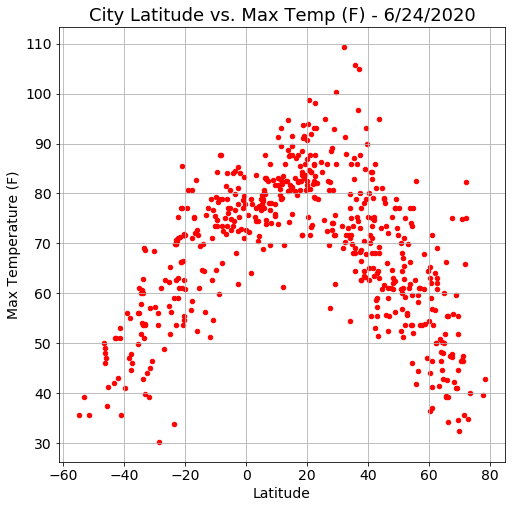

In [60]:

lat_v_temp_df = pd.DataFrame({"Latitude": clean_city_weather_data_df["Latitude"],
                              "Max Temperature (F)": clean_city_weather_data_df["Max Temperature (F)"],
                             })

lat_v_temp_chart = lat_v_temp_df.plot(kind="scatter", x="Latitude", y="Max Temperature (F)", c="red", grid=True,figsize=(8,8), fontsize=14)
lat_v_temp_chart.set_title("City Latitude vs. Max Temp (F) - 6/24/2020",fontsize=18 )
lat_v_temp_chart.set_xlabel("Latitude",fontsize=14 )
lat_v_temp_chart.set_ylabel("Max Temperature (F)",fontsize=14 )
plt.savefig("output_data/City Latitude vs. Max Temp.png")
plt.show()


## Latitude vs. Humidity Plot

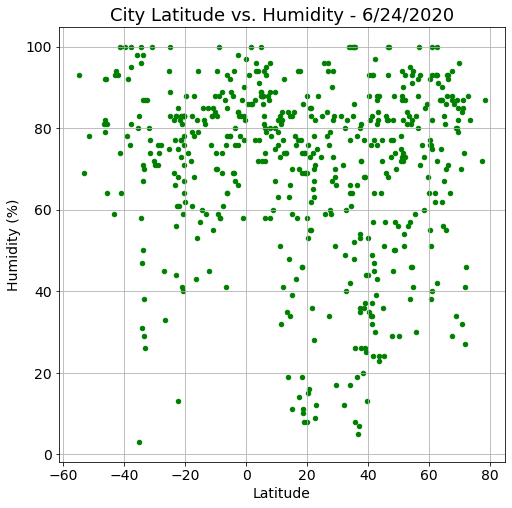

In [61]:
lat_v_humid_df = pd.DataFrame({"Latitude": clean_city_weather_data_df["Latitude"],
                              "Humidity (%)": clean_city_weather_data_df["Humidity (%)"],
                             })

lat_v_humid_chart = lat_v_humid_df.plot(kind="scatter", x="Latitude", y="Humidity (%)", c="green", grid=True,figsize=(8,8), fontsize=14)
lat_v_humid_chart.set_title("City Latitude vs. Humidity - 6/24/2020",fontsize=18 )
lat_v_humid_chart.set_xlabel("Latitude",fontsize=14 )
lat_v_humid_chart.set_ylabel("Humidity (%)",fontsize=14 )
plt.savefig("output_data/City Latitude vs. Humidity.png")
plt.show()


## Latitude vs. Cloudiness Plot

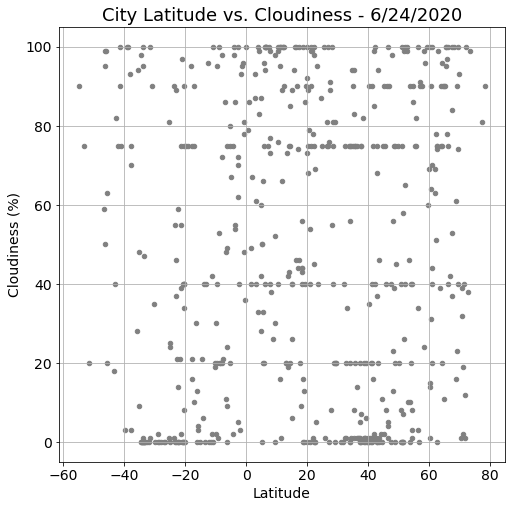

In [62]:
lat_v_cloud_df = pd.DataFrame({"Latitude": clean_city_weather_data_df["Latitude"],
                              "Cloudiness (%)": clean_city_weather_data_df["Cloudiness (%)"],
                             })

lat_v_cloud_chart = lat_v_cloud_df.plot(kind="scatter", x="Latitude", y="Cloudiness (%)", c="grey", grid=True,figsize=(8,8), fontsize=14)
lat_v_cloud_chart.set_title("City Latitude vs. Cloudiness - 6/24/2020",fontsize=18 )
lat_v_cloud_chart.set_xlabel("Latitude",fontsize=14 )
lat_v_cloud_chart.set_ylabel("Cloudiness (%)",fontsize=14 )
plt.savefig("output_data/City Latitude vs. Cloudiness.png")
plt.show()


## Latitude vs. Wind Speed Plot

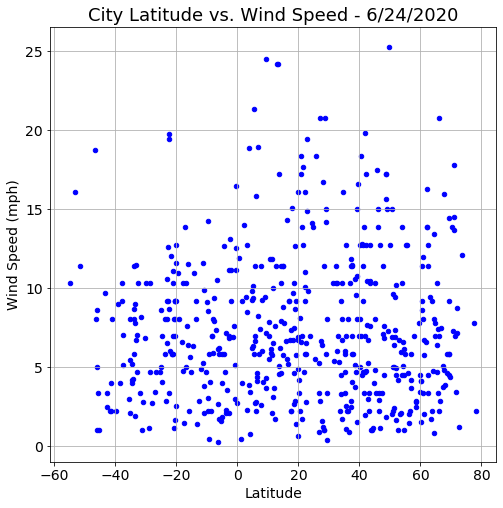

In [63]:
lat_v_wind_df = pd.DataFrame({"Latitude": clean_city_weather_data_df["Latitude"],
                              "Wind Speed (mph)": clean_city_weather_data_df["Wind Speed (mph)"],
                             })

lat_v_wind_chart = lat_v_wind_df.plot(kind="scatter", x="Latitude", y="Wind Speed (mph)", c="blue", grid=True,figsize=(8,8), fontsize=14)
lat_v_wind_chart.set_title("City Latitude vs. Wind Speed - 6/24/2020",fontsize=18 )
lat_v_wind_chart.set_xlabel("Latitude",fontsize=14 )
lat_v_wind_chart.set_ylabel("Wind Speed (mph)",fontsize=14 )
plt.savefig("output_data/City Latitude vs. Wind Speed.png")
plt.show()


## Linear Regression

In [ ]:
# OPTIONAL: Create a function to create Linear Regression plots

In [67]:
# Create Northern and Southern Hemisphere DataFrames

north_city_weather_data_df = clean_city_weather_data_df.loc[clean_city_weather_data_df["Latitude"] >= 0]
south_city_weather_data_df = clean_city_weather_data_df.loc[clean_city_weather_data_df["Latitude"] < 0]
north_city_weather_data_df


,City Name,City ID,Country,Latitude,Longitude,Date of Data Calculation,Max Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,Barcelona,3128760,ES,41.39,2.16,1593039780,75.00,83,20,4.70
1,Mana,3381041,GF,5.66,-53.78,1593039830,78.49,86,33,6.64
3,Wilmington,4499379,US,34.23,-77.94,1593039563,86.00,66,20,10.29
5,Hilo,5855927,US,19.73,-155.09,1593039587,80.60,69,90,16.11
10,Torbay,6167817,CA,47.67,-52.73,1593039830,75.20,73,40,11.41
...,...,...,...,...,...,...,...,...,...,...
545,Simbahan,1695180,PH,6.30,120.58,1593039896,83.16,72,94,4.12
546,Jinchang,1805733,CN,38.50,102.17,1593039896,70.41,20,82,3.71
547,Tessaoua,2438823,NE,13.76,7.99,1593039896,94.75,19,19,5.03
548,Pangnirtung,6096551,CA,66.15,-65.71,1593039897,39.20,93,75,6.93


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

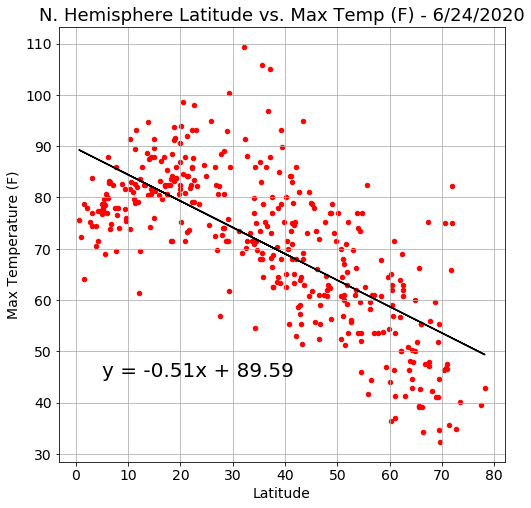

In [70]:
# calculate linear regression
lat = north_city_weather_data_df["Latitude"]
temp = north_city_weather_data_df["Max Temperature (F)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(lat, temp)
regress_values = lat * slope + intercept
line_regress_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


no_lat_v_temp_df = pd.DataFrame({"Latitude": north_city_weather_data_df["Latitude"],
                              "Max Temperature (F)": north_city_weather_data_df["Max Temperature (F)"],
                             })

no_lat_v_temp_chart = no_lat_v_temp_df.plot(kind="scatter", x="Latitude", y="Max Temperature (F)", c="red", grid=True,figsize=(8,8), fontsize=14)
no_lat_v_temp_chart.set_title("N. Hemisphere Latitude vs. Max Temp (F) - 6/24/2020",fontsize=18 )
no_lat_v_temp_chart.set_xlabel("Latitude",fontsize=14 )
no_lat_v_temp_chart.set_ylabel("Max Temperature (F)",fontsize=14 )

plt.plot(lat,regress_values,"k-")
plt.annotate(line_regress_eq,(5,45),fontsize=20,color="black")
plt.show()


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

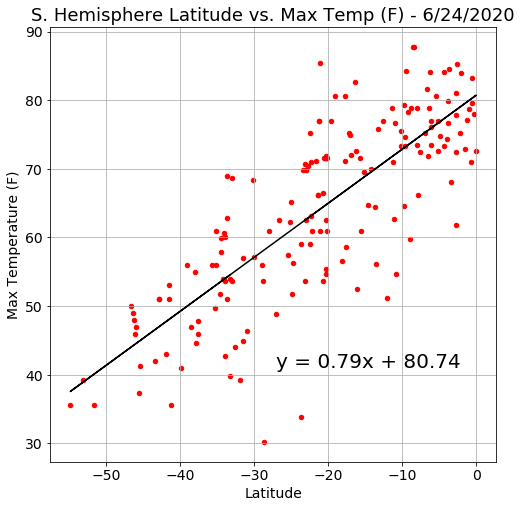

In [73]:
# calculate linear regression
lat = south_city_weather_data_df["Latitude"]
temp = south_city_weather_data_df["Max Temperature (F)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(lat, temp)
regress_values = lat * slope + intercept
line_regress_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


so_lat_v_temp_df = pd.DataFrame({"Latitude": south_city_weather_data_df["Latitude"],
                              "Max Temperature (F)": south_city_weather_data_df["Max Temperature (F)"],
                             })

so_lat_v_temp_chart = so_lat_v_temp_df.plot(kind="scatter", x="Latitude", y="Max Temperature (F)", c="red", grid=True,figsize=(8,8), fontsize=14)
so_lat_v_temp_chart.set_title("S. Hemisphere Latitude vs. Max Temp (F) - 6/24/2020",fontsize=18 )
so_lat_v_temp_chart.set_xlabel("Latitude",fontsize=14 )
so_lat_v_temp_chart.set_ylabel("Max Temperature (F)",fontsize=14 )

plt.plot(lat,regress_values,"k-")
plt.annotate(line_regress_eq,(-27,41),fontsize=20,color="black")
plt.show()


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

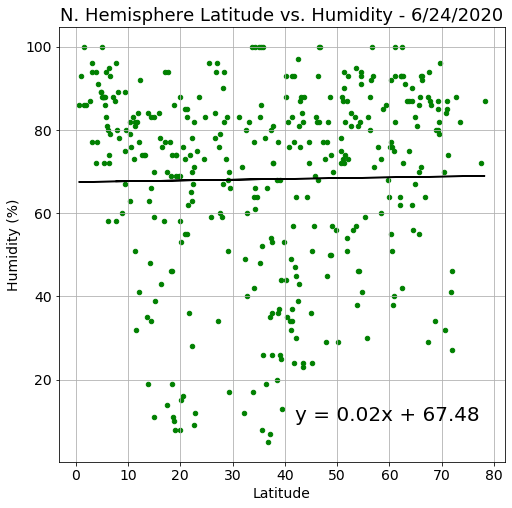

In [77]:

lat = north_city_weather_data_df["Latitude"]
humid = north_city_weather_data_df["Humidity (%)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(lat, humid)
regress_values = lat * slope + intercept
line_regress_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


no_lat_v_humid_df = pd.DataFrame({"Latitude": north_city_weather_data_df["Latitude"],
                              "Humidity (%)": north_city_weather_data_df["Humidity (%)"],
                             })

no_lat_v_humid_chart = no_lat_v_humid_df.plot(kind="scatter", x="Latitude", y="Humidity (%)", c="green", grid=True,figsize=(8,8), fontsize=14)
no_lat_v_humid_chart.set_title("N. Hemisphere Latitude vs. Humidity - 6/24/2020",fontsize=18 )
no_lat_v_humid_chart.set_xlabel("Latitude",fontsize=14 )
no_lat_v_humid_chart.set_ylabel("Humidity (%)",fontsize=14 )

plt.plot(lat,regress_values,"k-")
plt.annotate(line_regress_eq,(42,10),fontsize=20,color="black")
plt.show()


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

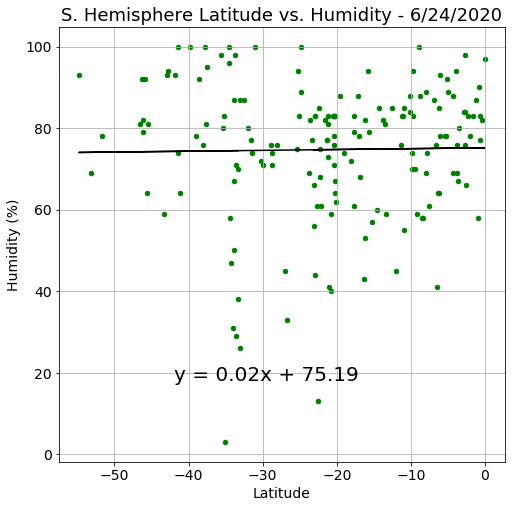

In [90]:
lat = south_city_weather_data_df["Latitude"]
humid = south_city_weather_data_df["Humidity (%)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(lat, humid)
regress_values = lat * slope + intercept
line_regress_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


so_lat_v_humid_df = pd.DataFrame({"Latitude": south_city_weather_data_df["Latitude"],
                              "Humidity (%)": south_city_weather_data_df["Humidity (%)"],
                             })

so_lat_v_humid_chart = so_lat_v_humid_df.plot(kind="scatter", x="Latitude", y="Humidity (%)", c="green", grid=True,figsize=(8,8), fontsize=14)
so_lat_v_humid_chart.set_title("S. Hemisphere Latitude vs. Humidity - 6/24/2020",fontsize=18 )
so_lat_v_humid_chart.set_xlabel("Latitude",fontsize=14 )
so_lat_v_humid_chart.set_ylabel("Humidity (%)",fontsize=14 )

plt.plot(lat,regress_values,"k-")
plt.annotate(line_regress_eq,(-42,18),fontsize=20,color="black")
plt.show()


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

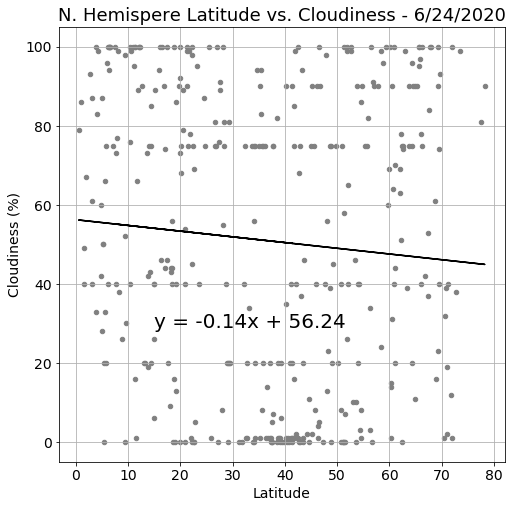

In [91]:
lat = north_city_weather_data_df["Latitude"]
cloud = north_city_weather_data_df["Cloudiness (%)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(lat, cloud)
regress_values = lat * slope + intercept
line_regress_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


no_lat_v_cloud_df = pd.DataFrame({"Latitude": north_city_weather_data_df["Latitude"],
                              "Cloudiness (%)": north_city_weather_data_df["Cloudiness (%)"],
                             })

no_lat_v_cloud_chart = no_lat_v_cloud_df.plot(kind="scatter", x="Latitude", y="Cloudiness (%)", c="grey", grid=True,figsize=(8,8), fontsize=14)
no_lat_v_cloud_chart.set_title("N. Hemispere Latitude vs. Cloudiness - 6/24/2020",fontsize=18 )
no_lat_v_cloud_chart.set_xlabel("Latitude",fontsize=14 )
no_lat_v_cloud_chart.set_ylabel("Cloudiness (%)",fontsize=14 )

plt.plot(lat,regress_values,"k-")
plt.annotate(line_regress_eq,(15,29),fontsize=20,color="black")
plt.show()


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

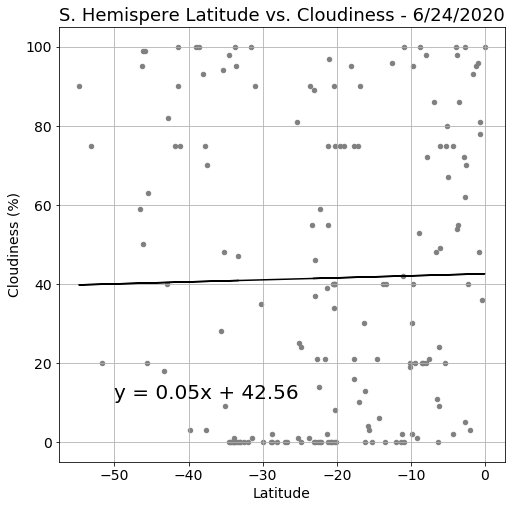

In [92]:
lat = south_city_weather_data_df["Latitude"]
cloud = south_city_weather_data_df["Cloudiness (%)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(lat, cloud)
regress_values = lat * slope + intercept
line_regress_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


so_lat_v_cloud_df = pd.DataFrame({"Latitude": south_city_weather_data_df["Latitude"],
                              "Cloudiness (%)": south_city_weather_data_df["Cloudiness (%)"],
                             })

so_lat_v_cloud_chart = so_lat_v_cloud_df.plot(kind="scatter", x="Latitude", y="Cloudiness (%)", c="grey", grid=True,figsize=(8,8), fontsize=14)
so_lat_v_cloud_chart.set_title("S. Hemispere Latitude vs. Cloudiness - 6/24/2020",fontsize=18 )
so_lat_v_cloud_chart.set_xlabel("Latitude",fontsize=14 )
so_lat_v_cloud_chart.set_ylabel("Cloudiness (%)",fontsize=14 )

plt.plot(lat,regress_values,"k-")
plt.annotate(line_regress_eq,(-50,11),fontsize=20,color="black")
plt.show()


####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

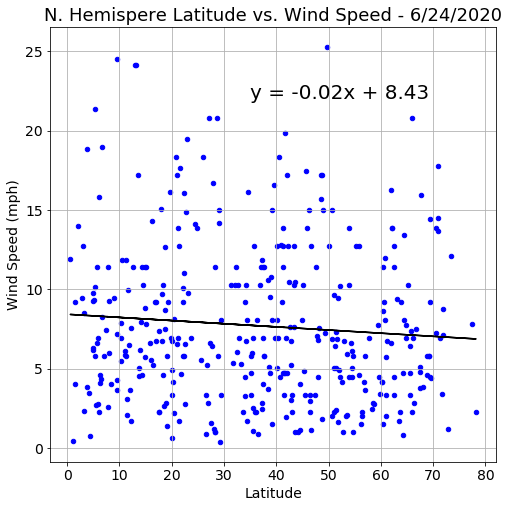

In [94]:
lat = north_city_weather_data_df["Latitude"]
wind = north_city_weather_data_df["Wind Speed (mph)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(lat, wind)
regress_values = lat * slope + intercept
line_regress_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

no_lat_v_wind_df = pd.DataFrame({"Latitude": north_city_weather_data_df["Latitude"],
                              "Wind Speed (mph)": north_city_weather_data_df["Wind Speed (mph)"],
                             })

no_lat_v_wind_chart = no_lat_v_wind_df.plot(kind="scatter", x="Latitude", y="Wind Speed (mph)", c="blue", grid=True,figsize=(8,8), fontsize=14)
no_lat_v_wind_chart.set_title("N. Hemispere Latitude vs. Wind Speed - 6/24/2020",fontsize=18 )
no_lat_v_wind_chart.set_xlabel("Latitude",fontsize=14 )
no_lat_v_wind_chart.set_ylabel("Wind Speed (mph)",fontsize=14 )

plt.plot(lat,regress_values,"k-")
plt.annotate(line_regress_eq,(35,22),fontsize=20,color="black")
plt.show()


####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

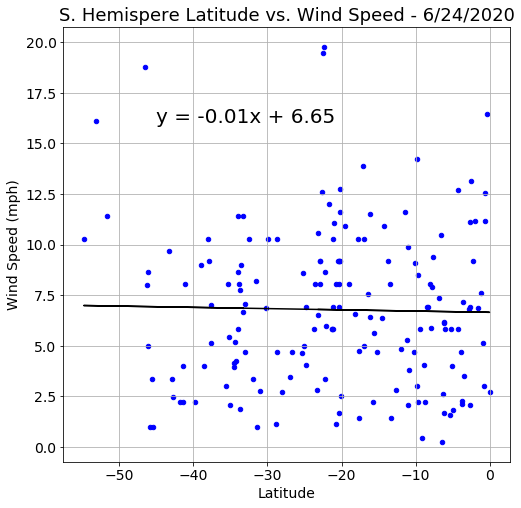

In [97]:
lat = south_city_weather_data_df["Latitude"]
wind = south_city_weather_data_df["Wind Speed (mph)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(lat, wind)
regress_values = lat * slope + intercept
line_regress_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

so_lat_v_wind_df = pd.DataFrame({"Latitude": south_city_weather_data_df["Latitude"],
                              "Wind Speed (mph)": south_city_weather_data_df["Wind Speed (mph)"],
                             })

so_lat_v_wind_chart = so_lat_v_wind_df.plot(kind="scatter", x="Latitude", y="Wind Speed (mph)", c="blue", grid=True,figsize=(8,8), fontsize=14)
so_lat_v_wind_chart.set_title("S. Hemispere Latitude vs. Wind Speed - 6/24/2020",fontsize=18 )
so_lat_v_wind_chart.set_xlabel("Latitude",fontsize=14 )
so_lat_v_wind_chart.set_ylabel("Wind Speed (mph)",fontsize=14 )

plt.plot(lat,regress_values,"k-")
plt.annotate(line_regress_eq,(-45,16),fontsize=20,color="black")
plt.show()
